In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# les libraires pour construire les modèles
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,plot_roc_curve,plot_precision_recall_curve

In [89]:
# importer la base de données
df = pd.read_csv('/Users/macbook/Desktop/cardio_train.csv',sep=',')

In [48]:
df.shape

(70000, 13)

In [49]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [51]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [52]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Parfait! Il n'y a pas de valeurs manquantes.

In [53]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Cross tabulations

In [54]:
pd.crosstab(df.gender,df.cardio)

cardio,0,1
gender,,
1,22914,22616
2,12107,12363


<AxesSubplot:xlabel='gender'>

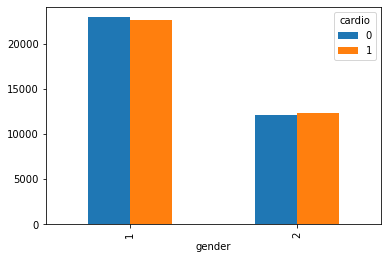

In [55]:
pd.crosstab(df.gender,df.cardio).plot(kind='bar')

In [56]:
pd.crosstab(df.age, df.cardio)

cardio,0,1
age,,
10798,1,0
10859,1,0
10878,1,0
10964,1,0
14275,0,1
...,...,...
23687,0,1
23690,0,1
23692,0,1


In [57]:
pd.crosstab(df.height,df.cardio)

cardio,0,1
height,,
55,0,1
57,0,1
59,1,0
60,1,0
64,1,0
...,...,...
197,1,3
198,5,9
200,0,1


In [58]:
pd.crosstab(df.weight,df.cardio)

cardio,0,1
weight,,
10.0,0,1
11.0,0,1
21.0,0,1
22.0,1,0
23.0,1,0
...,...,...
178.0,2,1
180.0,0,4
181.0,0,1


In [59]:
pd.crosstab(df.ap_hi,df.cardio)

cardio,0,1
ap_hi,,
-150,0,1
-140,0,1
-120,1,1
-115,1,0
-100,2,0
...,...,...
11020,0,1
11500,0,1
13010,1,1


In [60]:
pd.crosstab(df.ap_lo,df.cardio)

cardio,0,1
ap_lo,,
-70,0,1
0,15,6
1,1,0
6,2,0
7,2,0
...,...,...
9011,0,2
9100,0,1
9800,1,0


In [61]:
pd.crosstab(df.cholesterol,df.cardio)

cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


<AxesSubplot:xlabel='cholesterol'>

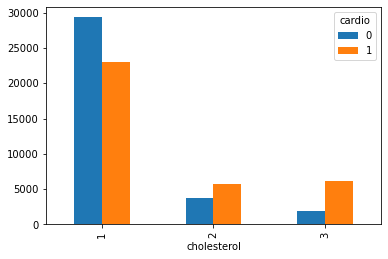

In [62]:
pd.crosstab(df.cholesterol,df.cardio).plot(kind='bar')

In [63]:
pd.crosstab(df.gluc,df.cardio)

cardio,0,1
gluc,,
1,30894,28585
2,2112,3078
3,2015,3316


<AxesSubplot:xlabel='gluc'>

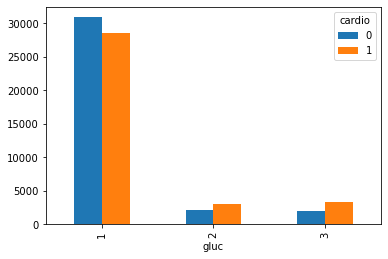

In [64]:
pd.crosstab(df.gluc,df.cardio).plot(kind='bar')

In [65]:
pd.crosstab(df.alco,df.cardio)

cardio,0,1
alco,,
0,33080,33156
1,1941,1823


<AxesSubplot:xlabel='alco'>

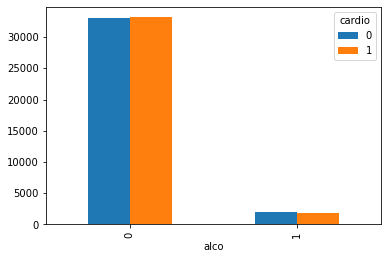

In [66]:
pd.crosstab(df.alco,df.cardio).plot(kind='bar')

In [67]:
pd.crosstab(df.smoke,df.cardio)

cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


<AxesSubplot:xlabel='smoke'>

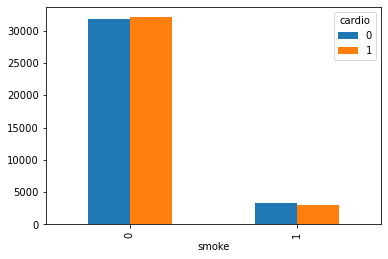

In [68]:
pd.crosstab(df.smoke,df.cardio).plot(kind = "bar")

In [69]:
pd.crosstab(df.active,df.cardio)

cardio,0,1
active,,
0,6378,7361
1,28643,27618


<AxesSubplot:xlabel='active'>

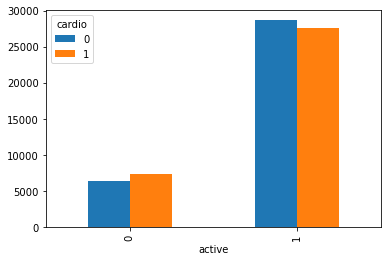

In [70]:
pd.crosstab(df.active,df.cardio).plot(kind="bar")

Selon les tableaux et les tabulations croisées précédentes, on peut avoir les résultats brefs:

- Les femmes sont plus susceptibles de développer une maladie cardiovasculaire que les hommes
- Les personnes présentant des valeurs de cholestérol supérieures à la normale ont un risque plus élevé de développer une maladies cardiovasculaire
- De même, les personnes diabétiques sont plus susceptibles de développer une maladie cardiovasculaire que les personnes sans diabéte
- Selon les enquêtes, les habitudes comme fumer et boire de l'alcool n'influence pas beaucoup d'avoir la maladie cardiovasculaire
- Enfin, le taux de maladies cardiovasculaires est plus élevé chez les personnes qui ne font pas d'exercice régulier

On découvre que l'âge représente par jours dans le dataset, il est difficile d'identifier, donc on l'essaie de le reformer en année, et puis le représentera par la densité pour trouver le lien entre la maladie cardiovasculaire.

In [71]:
# Ajouter une nouvelle colomne
df["age_year"]=df["age"]/365
# Enlever les colomnes inutiles
df=df.drop(columns=['id','age'])
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69996,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


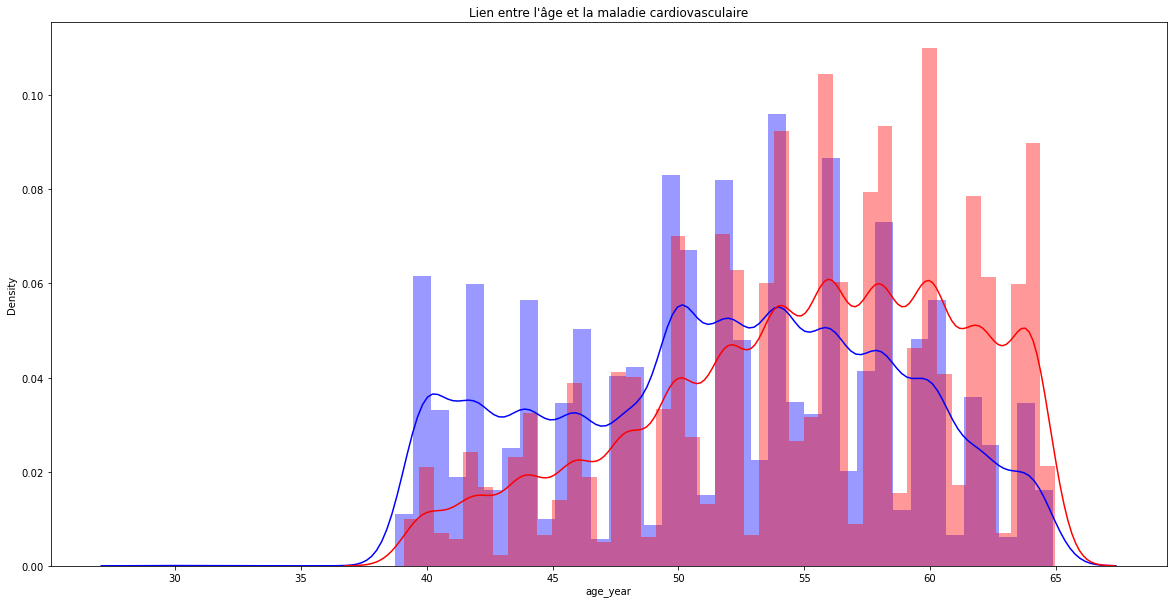

In [72]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['cardio'] == 0]["age_year"], color='blue',kde=True) 
sns.distplot(df[df['cardio'] == 1]["age_year"], color='red',kde=True)
plt.title("Lien entre l'âge et la maladie cardiovasculaire")
plt.show()

Selon ce graphque, on note que la maladie cardiovasculaire a une incidence plua élevée chez les personnes âgées de 55 à 60 ans par rappoet aux personnes moins de 55 ans.

D'après la carte de corrélation, la taiile et le poid ont moins corrée avec notre variable cible, mais il y a d'autre indice important concernant à notre santé, soit le BMI, on pourrait utiliser la taille et le poid pour le calculer.

In [73]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438
69996,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251


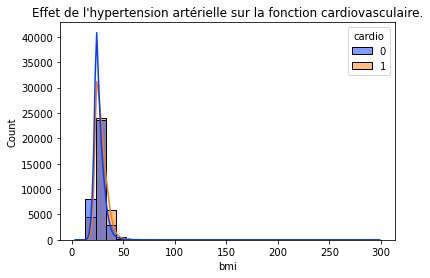

In [74]:
sns.histplot(data=df,x='bmi',hue='cardio',kde=True,bins=30,palette='bright')
plt.title("Effet de l'hypertension artérielle sur la fonction cardiovasculaire.")
plt.show()

L'incidence des maladies cardiaques est plus élevée chez les personnes dont l'BMI est supérieur.

## Corrélations entre les variables

<AxesSubplot:>

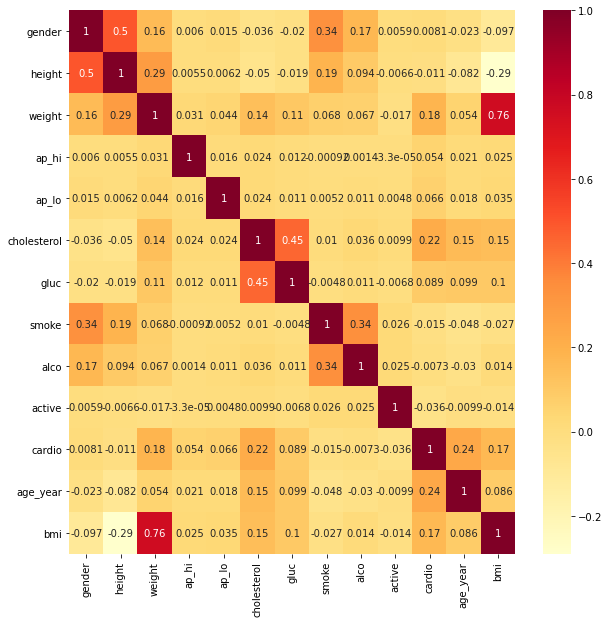

In [75]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True,cmap="YlOrRd")

On constate que les facteurs qui affectent principalement la caractéristique "cardio" sont : l'âge ,le cholestérol, ke poid et le bmi.

In [76]:
# On supprime les colonnes subjectives qui n'ont aucune corrélation avec la variable cible.
df1=df.drop(['active','alco','smoke'],axis=1)

## Modèles

In [77]:
X = df1.drop(['cardio'],axis=1)
y = df1['cardio'].copy()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

### Decision tree

In [79]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pre=dt.predict(X_test)
dt.score(X_test,y_test)

0.6331428571428571

Text(24.0, 0.5, 'Actually')

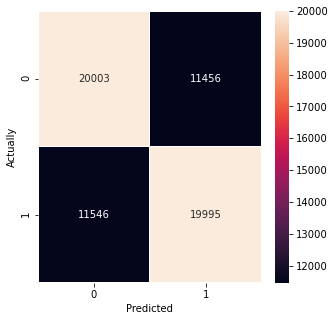

In [80]:
#plot confusion_matrix
y_train_pred = cross_val_predict(dt, X_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

In [81]:
print(classification_report(y_test,dt_pre))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64      3562
           1       0.63      0.63      0.63      3438

    accuracy                           0.63      7000
   macro avg       0.63      0.63      0.63      7000
weighted avg       0.63      0.63      0.63      7000



### Random forest

In [82]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pre=rf.predict(X_test)
rf.score(X_test,y_test)

0.7112857142857143

Text(24.0, 0.5, 'Actually')

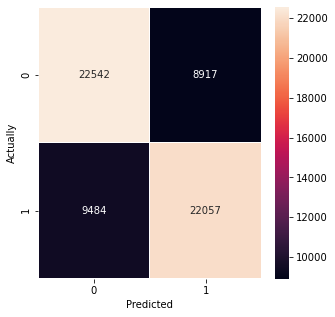

In [83]:
#plot confusion_matrix
y_train_pred = cross_val_predict(rf, X_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

In [84]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3562
           1       0.71      0.70      0.70      3438

    accuracy                           0.71      7000
   macro avg       0.71      0.71      0.71      7000
weighted avg       0.71      0.71      0.71      7000



### KNN

In [85]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
knn_pre=knn.predict(X_test)
knn.score(X_test,y_test)

0.728

Text(24.0, 0.5, 'Actually')

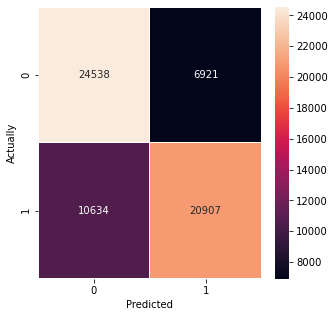

In [86]:
#plot confusion_matrix
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

In [87]:
print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3562
           1       0.75      0.67      0.71      3438

    accuracy                           0.73      7000
   macro avg       0.73      0.73      0.73      7000
weighted avg       0.73      0.73      0.73      7000



## Courbe ROC 

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_cur

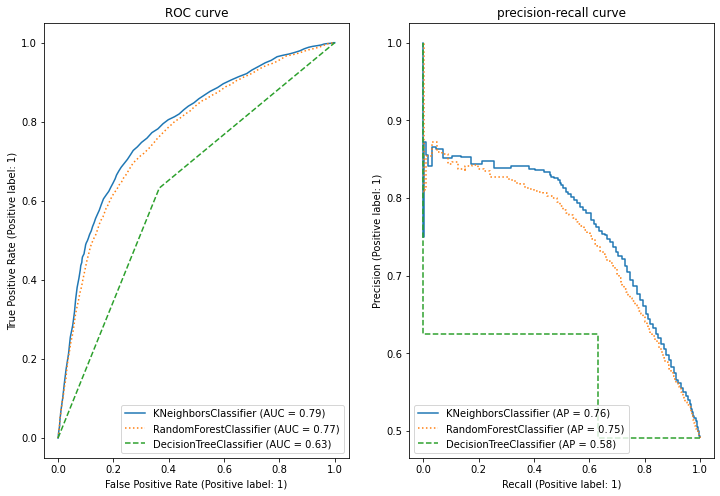

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8),sharex=True)

plot_roc_curve(knn, X_test, y_test,ax=ax1)
plot_roc_curve(rf, X_test, y_test,ax=ax1,linestyle=':')
plot_roc_curve(dt, X_test, y_test,ax=ax1,linestyle='--')
plot_precision_recall_curve(knn, X_test, y_test,ax=ax2)
plot_precision_recall_curve(rf, X_test, y_test,ax=ax2,linestyle=':')
plot_precision_recall_curve(dt, X_test, y_test,ax=ax2,linestyle='--')
ax1.set_title('ROC curve')
ax2.set_title('precision-recall curve')
plt.show()

D'après les trois courbes de ROC, on constate que le modèle KNN est meilleur pour prédire la maladie cardiovasculaires, car il a l'index AUC étant à 0.79( entre 0.75~0.8)